# Plotting the Stage PSDs of the iEEG data

In [1]:
import pickle
import numpy as np
import pandas as pd
import scipy.stats as stats

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import fooof for checking model fits
from fooof import FOOOF

# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/helpers")

from plots import plot_annotated_modelx

## Load data

In [2]:
save_path = '/home/b1044271/Columbia/Results/2025/iEEG_results.pkl'

with open(save_path, 'rb') as f:
    loaded_data = pickle.load(f)
    PSDs_W = loaded_data['PSDs']['Wakefulness']
    PSDs_N2 = loaded_data['PSDs']['N2']
    PSDs_N3 = loaded_data['PSDs']['N3']
    PSDs_R = loaded_data['PSDs']['REM']

Freqs = np.load('/home/b1044271/Columbia/Results/2025/iEEG_Freqs.npy')  

In [3]:
save_path = '/home/b1044271/Columbia/Results/2025/iEEG_results10.pkl'

with open(save_path, 'rb') as f:
    loaded_data = pickle.load(f)
    PSDs_W2 = loaded_data['PSDs']['Wakefulness']
    PSDs_N22 = loaded_data['PSDs']['N2']
    PSDs_N32 = loaded_data['PSDs']['N3']
    PSDs_R2 = loaded_data['PSDs']['REM']

Freqs10 = np.load('/home/b1044271/Columbia/Results/2025/iEEG_Freqs10.npy')

# REGIONS PSDS

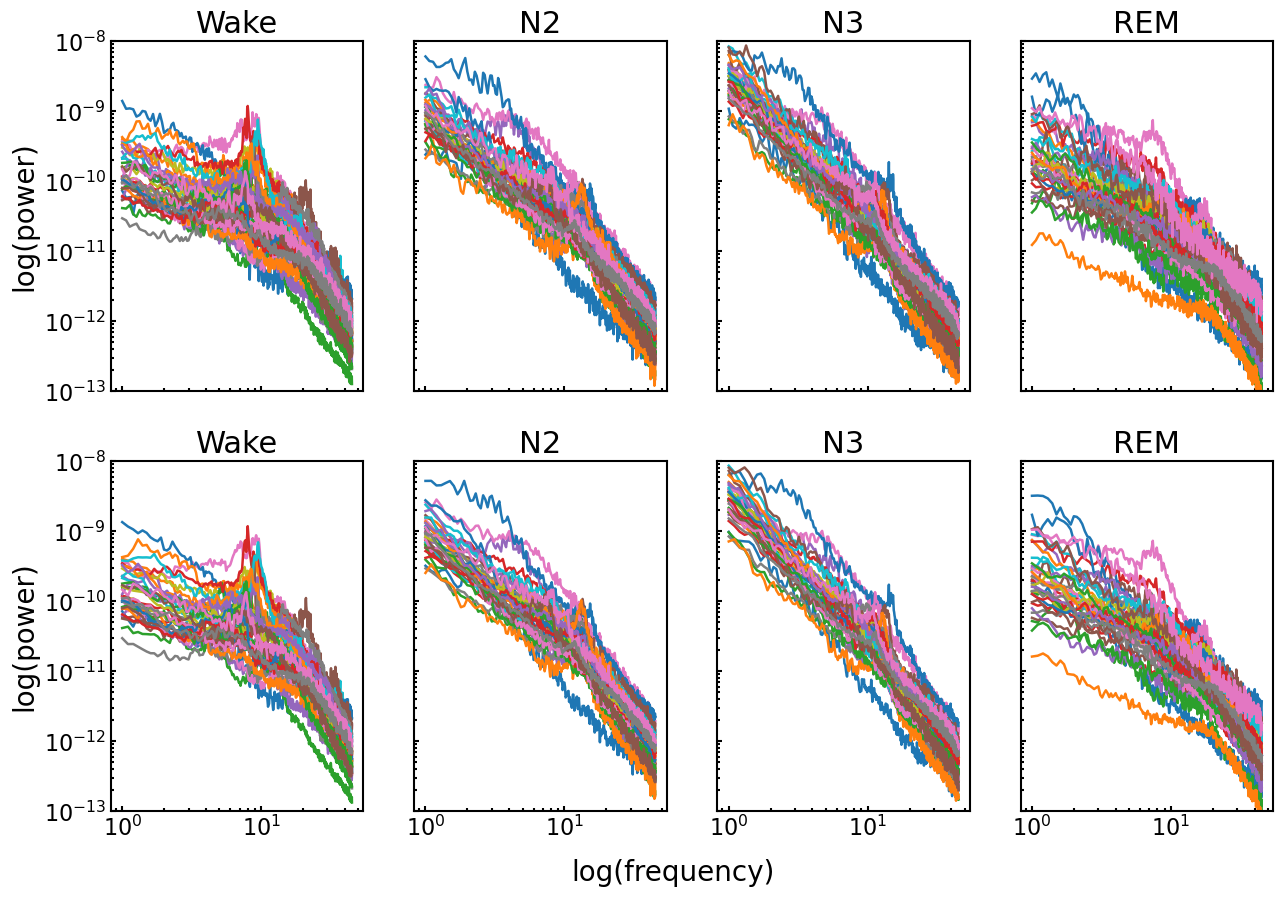

In [4]:
array_list = [PSDs_W,PSDs_N2, PSDs_N3 ,PSDs_R, PSDs_W2,PSDs_N22, PSDs_N32 ,PSDs_R2]
titles =  ['Wake','N2','N3' ,'REM', 'Wake','N2','N3' ,'REM']

# Plotting
fig, ax = plt.subplots(2,4, sharex=True, sharey=True, figsize=(15,10.))

for i, V in enumerate(array_list):

    if i <=3:
        ax.flatten()[i].loglog(Freqs,np.transpose(V), linewidth=1.8)
    else:
        ax.flatten()[i].loglog(Freqs10,np.transpose(V), linewidth=1.8)
        
    ax.flatten()[i].set_title(titles[i], fontsize =22)
    ax.flatten()[i].set_ylim([10e-14 ,10e-9])       


fig.text(0.5, 0.04, 'log(frequency)', ha='center', fontsize = 20)
ax.flatten()[0].set_ylabel('log(power)', fontsize = 20)
ax.flatten()[4].set_ylabel('log(power)', fontsize = 20)

for axs in ax.flatten():
    axs.spines['top'].set_linewidth(1.5)
    axs.spines['right'].set_linewidth(1.5)
    axs.spines['bottom'].set_linewidth(1.5)
    axs.spines['left'].set_linewidth(1.5)   # Set the linewidth of the left axis line
    axs.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties

plt.savefig("/home/b1044271/Columbia/Plots/Feb25/iEEG_PSDs_Regions.svg", dpi = 600)

# GROUP PSDs

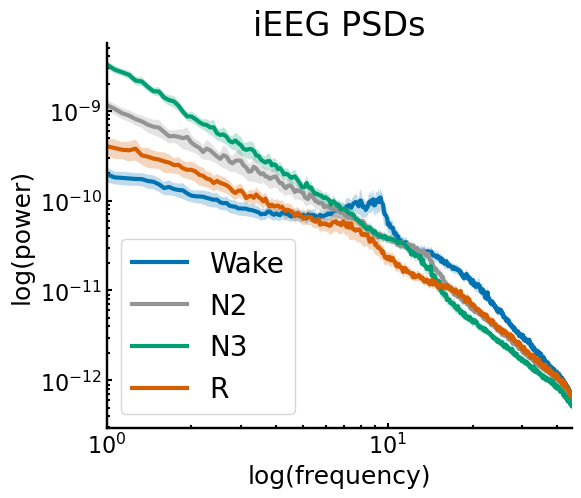

In [5]:
# Define sleep stages and their respective colors
sleep_stages = {
    "Wake": np.array(PSDs_W),
    "N2": np.array(PSDs_N2),
    "N3": np.array(PSDs_N3),
    "R": np.array(PSDs_R)
}

colors = [ sns.color_palette("colorblind")[0],  # Wake (blue)
    sns.color_palette("colorblind")[7],  # N2 (orange-brown)
    sns.color_palette("colorblind")[2],  # N3 (green)
    sns.color_palette("colorblind")[3],  # R (red)
         ]

# Compute means and standard errors for each stage
PSD_stats = {}
for stage, data in sleep_stages.items():
    PSD_stats[stage] = {
        "mean": np.nanmean(data, axis=0),
        "sem": stats.sem(data, axis=0, nan_policy="omit")
    }

# Plotting
plt.figure(figsize=(6, 5))

# Loop through sleep stages, statistics, and colors
for (stage, stats_dict), color in zip(PSD_stats.items(), colors):
    mean_values = stats_dict["mean"]
    sem_values = stats_dict["sem"]
    
    plt.plot(Freqs, mean_values, color=color, label=stage, linewidth=3)
    plt.fill_between(Freqs, mean_values - sem_values, mean_values + sem_values, 
                     facecolor=color, alpha=0.25)

# Labels and formatting
plt.ylabel('log(power)', fontsize=18)
plt.title('iEEG PSDs', fontsize=24)
plt.xlabel('log(frequency)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(Freqs[0], Freqs[-1])
plt.legend(fontsize=20)
plt.yscale('log')
plt.xscale('log')

# Customize plot appearance
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)


# GROUPS PSD 10s

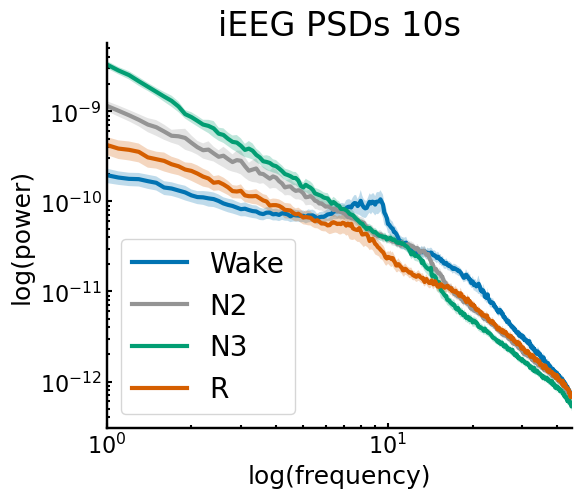

In [6]:
# Define sleep stages and their respective colors
sleep_stages = {
    "Wake": np.array(PSDs_W2),
    "N2": np.array(PSDs_N22),
    "N3": np.array(PSDs_N32),
    "R": np.array(PSDs_R2)
}

colors = [ sns.color_palette("colorblind")[0],  # Wake (blue)
    sns.color_palette("colorblind")[7],  # N2 (orange-brown)
    sns.color_palette("colorblind")[2],  # N3 (green)
    sns.color_palette("colorblind")[3],  # R (red)
         ]

# Compute means and standard errors for each stage
PSD_stats = {}
for stage, data in sleep_stages.items():
    PSD_stats[stage] = {
        "mean": np.nanmean(data, axis=0),
        "sem": stats.sem(data, axis=0, nan_policy="omit")
    }

# Plotting
plt.figure(figsize=(6, 5))

# Loop through sleep stages, statistics, and colors
for (stage, stats_dict), color in zip(PSD_stats.items(), colors):
    mean_values = stats_dict["mean"]
    sem_values = stats_dict["sem"]
    
    plt.plot(Freqs10, mean_values, color=color, label=stage, linewidth=3)
    plt.fill_between(Freqs10, mean_values - sem_values, mean_values + sem_values, 
                     facecolor=color, alpha=0.25)

# Labels and formatting
plt.ylabel('log(power)', fontsize=18)
plt.title('iEEG PSDs 10s', fontsize=24)
plt.xlabel('log(frequency)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(Freqs[0], Freqs[-1])
plt.legend(fontsize=20)
plt.yscale('log')
plt.xscale('log')

# Customize plot appearance
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

# PSDs Single Region

/home/b1044271/anaconda3/envs/mne/lib/python3.10/site-packages/fooof/utils/params.py:24: RuntimeWarning: invalid value encountered in double_scalars
  return knee ** (1./exponent)


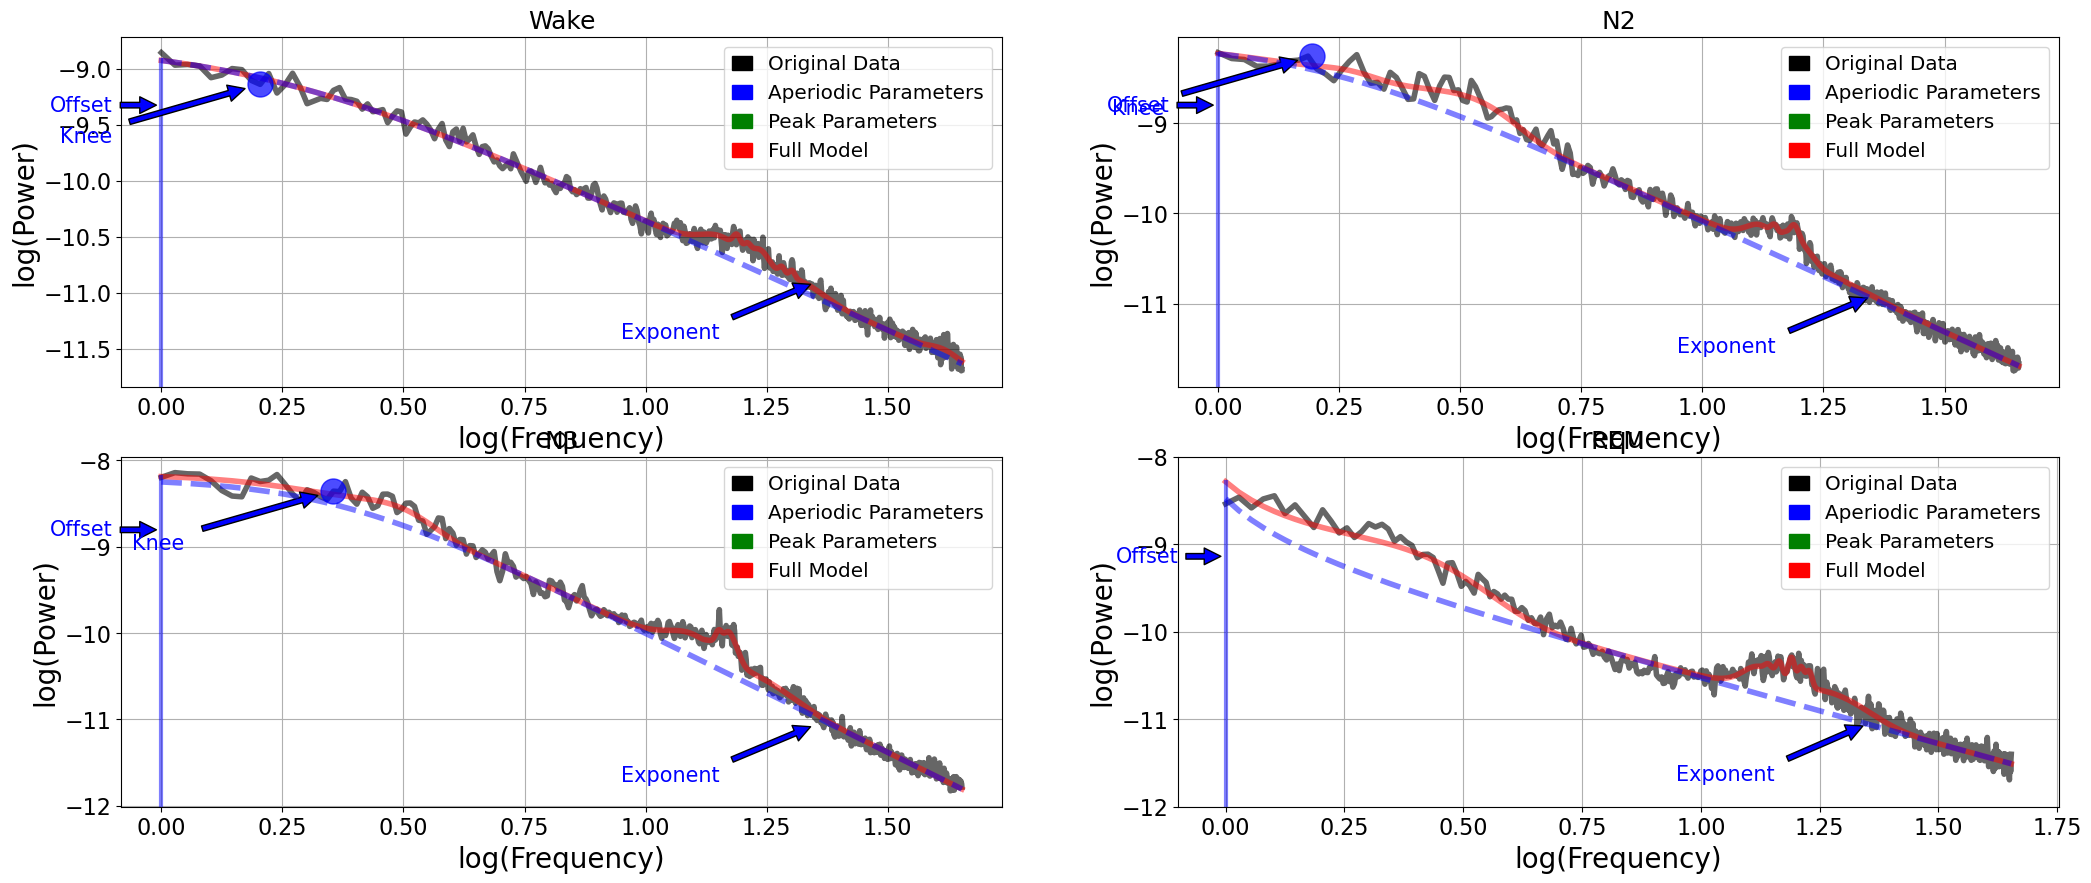

In [9]:
# Create figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(25, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over PSDs and fit FOOOF models
for i, (V, ax) in enumerate(zip(array_list, axes)):
    fmX = FOOOF(**SETTINGS_F1)
    fmX.fit(Freqs, V, [Freqs[0], Freqs[-1]])

    # Use the given subplot (ax) for plotting
    plot_annotated_modelx(fmX, -12, -8., plt_log=True, ax=ax)

    ax.set_title(titles[i], fontsize=18)

save